In [1]:
library(Seurat)
library(dplyr)

Attaching SeuratObject


载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
epi <- readRDS('./lf-lp_rna_filtered_harmony_new.rds')

In [3]:
# epi <- lf_lp[,lf_lp@meta.data$seurat_clusters %in% c(1,2,3,10)]
epi@meta.data$cells <- rownames(epi@meta.data)

In [4]:

epi@meta.data$group

[1] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
   [25] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
   [49] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
   [73] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
   [97] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [121] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [145] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [169] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [193] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [217] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [241] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [265] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [289] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [313] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [337] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [361] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [385] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [409] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [433] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [457] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [481] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [505] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [529] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [553] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [577] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [601] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [625] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [649] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [673] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [697] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [721] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [745] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [769] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [793] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [817] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [841] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [865] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [889] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [913] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [937] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [961] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
  [985] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [1009] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [1033] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [1057] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [1081] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [1105] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [1129] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [1153] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [1177] ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep ep
 [12

In [20]:
output_dir <- file.path('./')

if (!dir.exists(output_dir)){
dir.create(output_dir)
} else {
    print("Dir already exists!")
}

In [21]:

for ( i in c('lf','ep','mp','lp')){
  
    
    output_dir <- file.path(i)

    if (!dir.exists(output_dir)){
        dir.create(output_dir)
    } else {
        print("Dir already exists!")
    }
    rna_df <- as.matrix(epi[,epi@meta.data$group == i]@assays$RNA@data)

    tmp <- pair_orth[rownames(rna_df),'SYMBOL']

    rna_df <- rna_df[!is.na(tmp),]

    rownames(rna_df) <- tmp[!is.na(tmp)]

    rna_df <- rna_df[!duplicated(rownames(rna_df)),]

    meta_data <- epi[,epi@meta.data$group == i]@meta.data %>%
    dplyr::select(c('cells','cell_type')) %>%
    as.matrix()

    write.table(rna_df, paste(i,'/cellphonedb_count.txt',sep = ''), sep='\t', quote=F)
    write.table(meta_data, paste(i,'/cellphonedb_meta.txt',sep = ''), sep='\t', quote=F, row.names=F)
}

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.4 GiB"


In [22]:
output_dir <- file.path('./','all')

    if (!dir.exists(output_dir)){
        dir.create(output_dir)
    } else {
        print("Dir already exists!")
    }


rna_df <- as.matrix(epi@assays$RNA@data)

tmp <- pair_orth[rownames(rna_df),'SYMBOL']

rna_df <- rna_df[!is.na(tmp),]

rownames(rna_df) <- tmp[!is.na(tmp)]

rna_df <- rna_df[!duplicated(rownames(rna_df)),]

meta_data <- epi@meta.data %>%
dplyr::select(c('cells','cell_type')) %>%
as.matrix()

write.table(rna_df, paste('all','/cellphonedb_count.txt',sep = ''), sep='\t', quote=F)
write.table(meta_data, paste('all','/cellphonedb_meta.txt',sep = ''), sep='\t', quote=F, row.names=F)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 4.6 GiB"


In [4]:
library(ggplot2)
library(circlize)
library(igraph)
library(networkD3)
library(dplyr)

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



载入程辑包：‘igraph’


The following object is masked from ‘package:circlize’:

    degree


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



载入程辑包：‘networkD3’


The following object is masked from ‘package:SeuratObject’:

    JS


The following object is masked from ‘package:Seurat’:

    JS




In [9]:
change_to_italk_cell <- function(x){
    
    ls <- list()
    
    for (i in unique(x)){
        #message(i)
        cells <- stringr::str_split_fixed(i,pattern = '\\|',n = 2)
        cell_from <- cells[1]
        cell_to <- cells[2]

        ls[[i]] <- c(cell_from,cell_to)
        #message(ls[[i]])

    }
    return(ls)
}

#修正了受配体标记问题
change_to_italk_pair <- function(x){
    
    unqi_x <- x[!duplicated(x$interacting_pair),]
    
    ls <- list()
    
    for (i in 1:nrow(unqi_x)){
        #message(i)
        str_n <- unqi_x$interacting_pair[i]
        str_n <- stringr::str_replace(str_n ,pattern = '_complex',replace = ' complex')
        cells <- stringr::str_split(str_n,pattern = '_',n = 2)[[1]]
        if (length(cells) >2 ){
            message(length(cells))
        }
        if (unqi_x$receptor_a[i] == 'True'){
            cell_from <- cells[2]
            cell_to <- cells[1]
        }else{
            cell_from <- cells[1]
            cell_to <- cells[2]
        }
        ls[[unqi_x$interacting_pair[i]]] <- c(cell_from,cell_to)
        #message(ls[[i]])

    }
    return(ls)
}


NetView2<-function(data,color.use = NULL,title.name = NULL, sources.use = NULL, targets.use = NULL, idents.use = NULL, remove.isolate = FALSE, top = 1,
                            weight.scale = FALSE, vertex.weight = 20, vertex.weight.max = NULL, vertex.size.max = NULL, vertex.label.cex=1,vertex.label.color= "black",
                            edge.weight.max = NULL, edge.width.max=8, alpha.edge = 0.6, label.edge = FALSE,edge.label.color='black',edge.label.cex=0.8,
                            edge.curved=0.2,shape='circle',layout=in_circle(), margin=0.2, vertex.size = NULL,
                            arrow.width=1,arrow.size = 0.2){
  net<-data %>% group_by(cell_from,cell_to) %>% dplyr::summarize(n=n())
  net<-as.data.frame(net,stringsAsFactors=FALSE)
  g<-graph.data.frame(net,directed=TRUE,)
  edge.start <- igraph::ends(g, es=igraph::E(g), names=FALSE)
  coords<-layout_(g,layout)
  if(nrow(coords)!=1){
    coords_scale=scale(coords)
  }else{
    coords_scale<-coords
  }
  if (is.null(color.use)) {
    color.use = scPalette(length(igraph::V(g)))
  }
  if (is.null(vertex.weight.max)) {
    vertex.weight.max <- max(vertex.weight)
  }
  vertex.weight <- vertex.weight/vertex.weight.max*vertex.size.max+5

  loop.angle<-ifelse(coords_scale[igraph::V(g),1]>0,-atan(coords_scale[igraph::V(g),2]/coords_scale[igraph::V(g),1]),pi-atan(coords_scale[igraph::V(g),2]/coords_scale[igraph::V(g),1]))
  igraph::V(g)$size<-vertex.weight
  igraph::V(g)$color<-color.use[igraph::V(g)]
  igraph::V(g)$frame.color <- color.use[igraph::V(g)]
  igraph::V(g)$label.color <- vertex.label.color
  igraph::V(g)$label.cex<-vertex.label.cex
  igraph::E(g)$weight <- E(g)$n
  if(label.edge){
    igraph::E(g)$label<-igraph::E(g)$weight
    igraph::E(g)$label <- round(igraph::E(g)$label, digits = 1)
  }
  if (is.null(edge.weight.max)) {
    edge.weight.max <- max(igraph::E(g)$weight)
  }
  if (weight.scale == TRUE) {
    #E(g)$width<-0.3+edge.width.max/(max(E(g)$weight)-min(E(g)$weight))*(E(g)$weight-min(E(g)$weight))
    igraph::E(g)$width<- 0.3+igraph::E(g)$weight/edge.weight.max*edge.width.max
  }else{
    igraph::E(g)$width<-0.3+edge.width.max*igraph::E(g)$weight
  }

  igraph::E(g)$arrow.width<-arrow.width
  igraph::E(g)$arrow.size<-arrow.size
  igraph::E(g)$label.color<-edge.label.color
  igraph::E(g)$label.cex<-edge.label.cex
  igraph::E(g)$color<- grDevices::adjustcolor(igraph::V(g)$color[edge.start[,1]],alpha.edge)
  igraph::E(g)$loop.angle <- rep(0, length(igraph::E(g)))

  if(sum(edge.start[,2]==edge.start[,1])!=0){
    igraph::E(g)$loop.angle[which(edge.start[,2]==edge.start[,1])]<-loop.angle[edge.start[which(edge.start[,2]==edge.start[,1]),1]]
  }
  radian.rescale <- function(x, start=0, direction=1) {
    c.rotate <- function(x) (x + start) %% (2 * pi) * direction
    c.rotate(scales::rescale(x, c(0, 2 * pi), range(x)))
  }
  label.locs <- radian.rescale(x=1:length(igraph::V(g)), direction=-1, start=0)
  label.dist <- vertex.weight/max(vertex.weight)+2
  plot(g,edge.curved=edge.curved,vertex.shape=shape,layout=coords_scale,margin=margin, vertex.label.dist=label.dist,
       vertex.label.degree=label.locs, vertex.label.family="Helvetica", edge.label.family="Helvetica") # "sans"
  if (!is.null(title.name)) {
    text(0,1.5,title.name, cex = 1.1)
  }
  # https://www.andrewheiss.com/blog/2016/12/08/save-base-graphics-as-pseudo-objects-in-r/
  # grid.echo()
  # gg <-  grid.grab()
  #gg <- recordPlot()
  #return(gg)
}

LRPlot<-function(data,datatype,gene_col=NULL,transparency=0.5,link.arr.lwd=1,link.arr.lty=NULL,link.arr.col=NULL,link.arr.width=NULL,
                 link.arr.type=NULL,facing='clockwise',cell_col=NULL,print.cell=TRUE,track.height_1=uh(2,'mm'),track.height_2=uh(12,'mm'),
                 annotation.height_1=0.01,annotation.height_2=0.01,text.vjust = '0.4cm',...){
  cell_group<-unique(c(data$cell_from,data$cell_to))
  genes<-c(structure(data$ligand,names=data$cell_from),structure(data$receptor,names=data$cell_to))
  genes<-genes[!duplicated(paste(names(genes),genes))]
  genes<-genes[order(names(genes))]
  if(is.null(link.arr.lty)){
    if(datatype=='mean count'){
      link.arr.lty='solid'
    }else if(datatype=='DEG'){
      link.arr.lty=structure(ifelse(data$cell_from_logFC==0.0001,'dashed','solid'),names=paste(data$cell_from,data$receptor))
    }else{
      print('invalid datatype')
    }
  }
  if(is.null(link.arr.col)){
    if(datatype=='mean count'){
      data<-data %>% mutate(link_col='black')
    }else if(datatype=='DEG'){
      data<-data %>% mutate(link_col=ifelse(cell_from_logFC==0.0001,ifelse(cell_to_logFC>0,'#d73027','#00ccff'),
                                            ifelse(cell_to_logFC==0.0001,ifelse(cell_from_logFC>0,'#d73027','#00ccff'),
                                                   ifelse(cell_from_logFC>0,ifelse(cell_to_logFC>0,'#d73027','#dfc27d'),
                                                          ifelse(cell_to_logFC>0,'#9933ff','#00ccff')))))
    }else{
      print('invalid datatype')
    }
  }else{
    data$link_col=link.arr.col
  }
  if(is.null(link.arr.type)){
    if(datatype=='mean count'){
      link.arr.type='triangle'
    }else if(datatype=='DEG'){
      link.arr.type=structure(ifelse(data$cell_to_logFC==0.0001,'ellipse','triangle'),names=paste(data$cell_from,data$receptor))
    }else{
      print('invalid datatype')
    }
  }
  if(is.null(gene_col)){
    #改了配色
    comm_col<-structure(c('#A15600','#99ccff','#ff9999','#ffcc99'),names=c('other','cytokine','checkpoint','growth factor'))
    gene_col<-structure(c(comm_col[data$comm_type],rep('#073c53',length(data$receptor))),names=c(data$ligand,data$receptor))
  }
  if(is.null(cell_col)){
    cell_col<-structure(randomColor(count=length(unique(names(genes))),luminosity='dark'),names=unique(names(genes)))
  }
  if(is.null(link.arr.lwd)){
    data<-data %>% mutate(arr_width=1)
  }else if(max(abs(link.arr.lwd))-min(abs(link.arr.lwd))==0 && all(link.arr.lwd!=0.0001)){
    data<-data %>% mutate(arr_width=ifelse(abs(link.arr.lwd<5),abs(link.arr.lwd),5))
  }else{
    #加了宽度
    data<-data %>% mutate(arr_width=ifelse(link.arr.lwd==0.0001,2,(1+5/(max(abs(link.arr.lwd))-min(abs(link.arr.lwd)))*(abs(link.arr.lwd)-min(abs(link.arr.lwd))))*2))
  }
  if(length(cell_group)!=1){
    gap.degree <- do.call("c", lapply(table(names(genes)), function(i) c(rep(1, i-1), 8)))
  }else{
    gap.degree <- do.call("c", lapply(table(names(genes)), function(i) c(rep(1, i))))
  }
  circos.par(gap.degree = gap.degree)
  if(length(gene_col)==1){
    grid.col=gene_col
  }else{
    grid.col=gene_col[genes]
    names(grid.col)<-paste(names(genes),genes)
  }
  if(is.null(link.arr.width)){
    data<-data %>% mutate(link.arr.width=data$arr_width/10)
  }else if(max(abs(link.arr.width))-min(abs(link.arr.width))==0 && all(link.arr.width!=0.0001)){
    data<-data %>% mutate(link.arr.width=ifelse(abs(link.arr.width)<0.5,abs(link.arr.width),0.5))
  }else{
    data<-data %>% mutate(link.arr.width=ifelse(link.arr.width==0.0001,0.2,(1+5/(max(abs(link.arr.width))-min(abs(link.arr.width)))*(abs(link.arr.width)-min(abs(link.arr.width))))/10))
  }
  chordDiagram(as.data.frame(cbind(paste(data$cell_from,data$ligand),paste(data$cell_to,data$receptor))), order=paste(names(genes),genes),
               grid.col=grid.col,transparency=transparency,directional=1,direction.type='arrows',link.arr.lwd=data$arr_width,link.arr.lty=link.arr.lty,
               link.arr.type=link.arr.type,link.arr.width=data$link.arr.width,link.arr.col=data$link_col,col='#00000000',annotationTrack=c('grid'),preAllocateTracks = list(
                 list(track.height = track.height_1),list(track.height = track.height_2)),annotationTrackHeight = c(annotation.height_1,annotation.height_2),...)

  circos.trackPlotRegion(track.index = 2, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.index = genes[get.cell.meta.data("sector.numeric.index")]
    circos.text(mean(xlim),mean(ylim),sector.index, col = "black", cex = 0.7, facing = facing, niceFacing = TRUE)
  }, bg.border = 0)

  if(print.cell){
    for(c in unique(names(genes))) {
      gene = as.character(genes[names(genes) == c])
      highlight.sector(sector.index = paste(c,gene), track.index = 1, col = ifelse(length(cell_col)==1,cell_col,cell_col[c]), text = c, text.vjust = text.vjust, niceFacing = TRUE,lwd=1)
    }
  }
  circos.clear()
}

In [1]:
deconvoluted <- read.table('/all/out/deconvoluted.txt',sep='\t',header=T,check.names = F)
count_network <- read.table('/all/out/count_network.txt',sep='\t',header=T,check.names = F)
interaction_count <- read.table('./cpdb_10_26/all/out/interaction_count.txt',sep='\t',header=T,check.names = T)
means <- read.table('/all/out/means.txt',sep='\t',header=T,check.names = F)
pvalues <- read.table('/all/out/pvalues.txt',sep='\t',header=T,check.names = F)
significant_means <- read.table('all/out/significant_means.txt',sep='\t',header=T,check.names = F)

In [ ]:
interaction_count$X <- factor(interaction_count$X,levels = sort(interaction_count$X))

p <-ggplot(interaction_count, aes(x=X, y=all_sum)) + 
  geom_bar(stat = "identity",fill = rgb(0.1,0.4,0.5,0.7))+
xlab('cluster')+
theme_classic()+
theme(axis.text = element_text(size = 12),
      axis.text.x = element_text(angle =15,hjust = 1),
     axis.title = element_text(size = 14))

In [5]:
ggsave(p,filename = '/all/out/interaction_count.pdf',width = 5,height = 5)

In [6]:
count_network_mtx <- tidyr::spread(data = count_network,key = 'TARGET',value = 'count')
rownames(count_network_mtx) <- count_network_mtx$SOURCE
count_network_mtx <- count_network_mtx[,2:ncol(count_network_mtx)] %>% as.matrix()

count_network_mtx

,basal cell,blood_epithelium,cldn4_epithelium,col12a1_fibroblast,col6a1_fibroblast,fibroblast,immune II,immuneI,ion I,ion II,krt8_epithelium,lectin_epithelium,smooth muscle,Vascular endothelium
basal cell,15,15,10,33,42,34,11,11,15,10,33,6,32,33
blood_epithelium,15,2,2,23,21,21,3,7,7,2,21,3,23,12
cldn4_epithelium,10,2,1,10,6,2,4,4,6,2,12,4,6,12
col12a1_fibroblast,33,23,10,19,35,33,20,9,10,17,35,2,39,45
col6a1_fibroblast,42,21,6,35,24,40,25,12,11,20,39,8,45,48
fibroblast,34,21,2,33,40,19,26,6,7,19,38,1,37,46
immune II,11,3,4,20,25,26,4,10,8,3,17,3,24,13
immuneI,11,7,4,9,12,6,10,3,5,6,11,4,10,14
ion I,15,7,6,10,11,7,8,5,4,7,16,5,10,8
ion II,10,2,2,17,20,19,3,6,7,1,18,1,20,6


In [16]:
pdf('./all/out/cellphonedb_count_heatmap.pdf',width = 11,height = 10)

col_fun = circlize::colorRamp2(c(0, 20, 40), c("#6B8968", "#FBD786", "#91374B"))
ComplexHeatmap::Heatmap(count_network_mtx,
                        col = col_fun,
                        row_names_gp = grid::gpar(fontsize = 12),
                        column_names_gp = grid::gpar(fontsize = 12),
                        rect_gp = grid::gpar(col = "white", lwd = 2),
                       column_names_rot = 45,
                       column_names_max_height = ComplexHeatmap::max_text_width(
        colnames(count_network_mtx), 
        gp = grid::gpar(fontsize = 12)
    ))

dev.off()

pdf 
  2

In [ ]:
col_fun = circlize::colorRamp2(c(0, 20, 40), c("#6B8968", "#FBD786", "#91374B"))
ComplexHeatmap::Heatmap(count_network_mtx,
                        col = col_fun,
                        row_names_gp = grid::gpar(fontsize = 12),
                        column_names_gp = grid::gpar(fontsize = 12),
                        rect_gp = grid::gpar(col = "white", lwd = 2),
                       column_names_rot = 60,
                       column_names_max_height = ComplexHeatmap::max_text_width(
        colnames(count_network_mtx), 
        gp = grid::gpar(fontsize = 12)
    ))

In [7]:
mean_mtx <- means[,c(2,8,12:ncol(means))]
pvalue_mtx <- pvalues[,c(2,8,12:ncol(means))]

mean_long  <- mean_mtx %>% tidyr::gather(cells,value,'Vascular endothelium|Vascular endothelium':'smooth muscle|smooth muscle')
p_long  <- pvalue_mtx %>% tidyr::gather(cells,value,'Vascular endothelium|Vascular endothelium':'smooth muscle|smooth muscle')

plot_df <- mean_long %>%  select(-'receptor_a') %>% cbind(p_long$value)
colnames(plot_df) <- c('interacting_pair','x','value','pvalue')
plot_df$logpvalue <- -log10(plot_df$pvalue)
plot_df$logvalue <- log2(plot_df$value)
plot_df[plot_df$pvalue == 0,]$logpvalue <- 3 

plot_df <- plot_df %>% filter(logpvalue > 2)

plot_df$interacting_pair <- stringr::str_replace(string = plot_df$interacting_pair,pattern = '_',replacement = ' | ') 
plot_df$x <- stringr::str_replace(string = plot_df$x,pattern = '\\|',replacement = ' | ') 

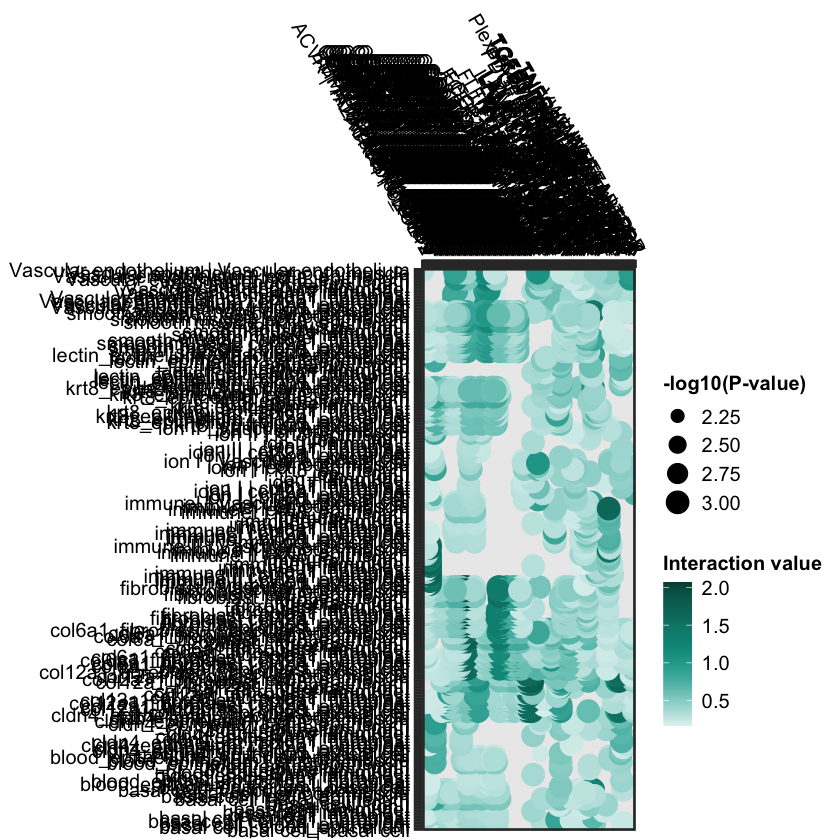

In [33]:
p <- ggplot(plot_df,aes(x=interacting_pair,y=x))+
  geom_point(aes(size=logpvalue,
                 color=value))+
  theme_bw()+
  scale_x_discrete(position = 'top')+
  theme(panel.border = element_rect(size = 1.5),
        axis.ticks = element_line(size = 1),
        axis.ticks.length = unit(5,'points'),
        axis.text.x=element_text(angle=-60,hjust = 1,vjust=1),
        axis.text = element_text(size = 12,colour = 'black'),
       legend.text = element_text(size = 12),
       legend.title = element_text(size = 12,face = 'bold'))+
  #scale_colour_gradient2(low="white",mid="yellow",high="red",midpoint=1)+
  ggsci::scale_color_material("teal")+
  labs(x=NULL,y=NULL,size="-log10(P-value)",color = 'Interaction value')+
  guides(size=guide_legend(order=3))
p

In [26]:
ggsave(p,filename = './all/out/_pair_dotplot_logp2.pdf',width = 15,height = 5)

In [10]:
chang_list_cell <- mean_long$cells %>% change_to_italk_cell() %>% as.data.frame(check.names = F) %>% t() %>% as.data.frame()
colnames(chang_list_cell) <- c('cell_from','cell_to')
chang_list_cell <- chang_list_cell %>% mutate(cells=rownames(chang_list_cell))

chang_list_pair <- mean_long %>% change_to_italk_pair() %>% as.data.frame(check.names = F) %>% t() %>% as.data.frame()
colnames(chang_list_pair) <- c('ligand','receptor')
chang_list_pair <- chang_list_pair %>% mutate(interacting_pair=rownames(chang_list_pair))

mean_long <- mean_long %>% 
    merge(chang_list_cell,by='cells') %>% 
    merge(chang_list_pair,by='interacting_pair')

mean_long <- mean_long %>%
    mutate(cell_from_mean_exprs = mean_long$value) %>%
    mutate(cell_to_mean_exprs = mean_long$value)

cp_05 <- mean_long %>% filter(value > 0.5)

p_cols <-c('#B58463','#A3B4D2','#91C6CE','#B6A4C7','#DBADC2','#BA6BA0','#A18F65','#349BAF','#A4AC59','#D6B763','#C76B25','#9EAFA2','#679A74','#5B3B85','#266795')

In [12]:
tmp <- cp_05 %>% dplyr::filter(cell_from_mean_exprs >= 0.5) %>% dplyr::select(c('ligand','receptor','cell_from_mean_exprs','cell_from','cell_to_mean_exprs','cell_to')) %>%
        dplyr::mutate(comm_type='other')%>%
        dplyr::filter((cell_from == 'krt8_epithelium' | cell_to == 'krt8_epithelium') & (cell_from == 'blood_epithelium' | cell_to == 'blood_epithelium'))

linkt <-tmp %>% select(c('cell_from','ligand','receptor','cell_from_mean_exprs'))
colnames(linkt) <- c('cell_from','source','target','value')

linkt[linkt$cell_from == 'blood_epithelium',]$cell_from <- 'cell_1'
linkt[linkt$cell_from == 'krt8_epithelium',]$cell_from <- 'cell_2'

nodet <- data.frame(
  name=c(as.character(linkt$source), as.character(linkt$target)) %>% 
    unique()
)

# With networkD3, connection must be provided using id, not using real name like in the links dataframe.. So we need to reformat it.
linkt$IDsource <- match(linkt$source, nodet$name)-1 
linkt$IDtarget <- match(linkt$target, nodet$name)-1

In [44]:
my_color <- 'd3.scaleOrdinal(d3.schemeCategory10)'
p <- sankeyNetwork(Links = linkt, Nodes = nodet,
              Source = "IDsource", Target = "IDtarget",
              Value = "value", NodeID = "name",  colourScale = JS(my_color), LinkGroup="cell_from",NodeGroup='name',height  =500,width =1000,
              sinksRight=FALSE,nodeWidth=40, fontSize=13, nodePadding=10)
p

HTML widgets cannot be represented in plain text (need html)

In [45]:
p %>% saveNetwork(file = './all/out/sankey_Net_mf.html',selfcontained = TRUE)
webshot::webshot('./all/out/sankey_Net_mf.html', "./cpdb_10_26/all/out/sankey_Net_mf.pdf",) 

In [13]:
cell_cols <- c('#9EAFA2','#91C6CE','#B6A4C7')
names(cell_cols) <- c('krt8_epithelium','blood_epithelium','cldn4_epithelium')
cell_cols

krt8_epithelium blood_epithelium cldn4_epithelium 
       "#9EAFA2"        "#91C6CE"        "#B6A4C7"

In [14]:
cp_05$color = cell_cols[cp_05$cell_from]

In [15]:
tmp <- cp_05 %>% dplyr::select(c('ligand','receptor','cell_from_mean_exprs','cell_from','cell_to_mean_exprs','cell_to','color')) %>%
        dplyr::mutate(comm_type='other')%>%
        dplyr::filter((cell_from %in% c('krt8_epithelium','blood_epithelium','cldn4_epithelium')) &
                      (cell_to %in% c('krt8_epithelium','blood_epithelium','cldn4_epithelium')))

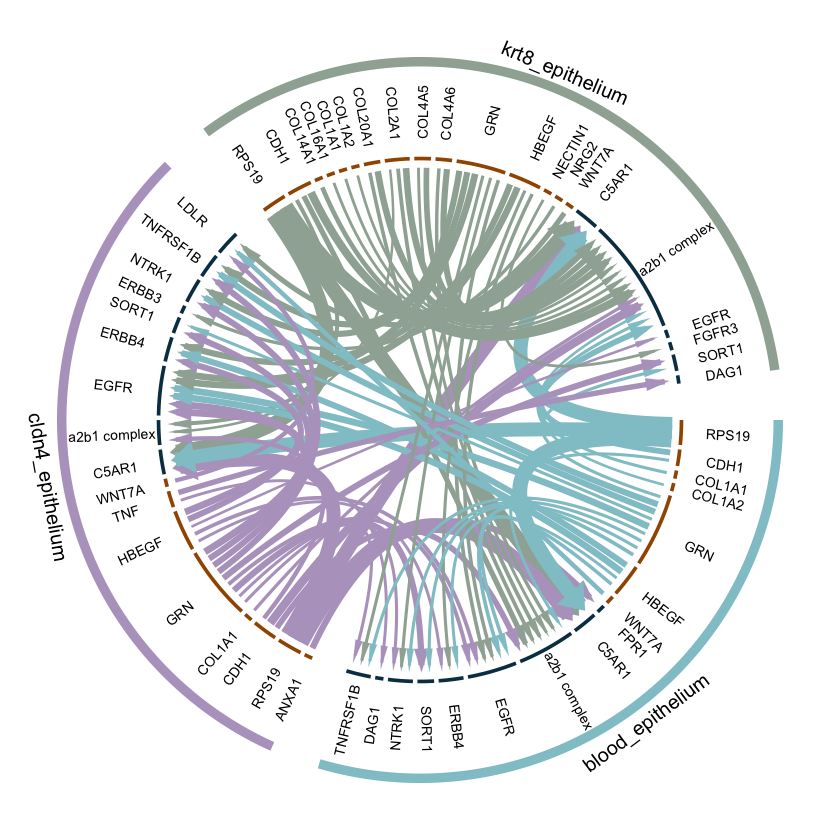

In [14]:
LRPlot(tmp,datatype='mean count',cell_col=cell_cols,
       track.height_2=uh(16,'mm'),link.arr.col = tmp$color,
       link.arr.lwd=tmp$cell_from_mean_exprs,link.arr.width=tmp$cell_to_mean_exprs)

In [21]:
LRPlot2<-function(data,datatype,gene_col=NULL,transparency=0.5,link.arr.lwd=1,link.arr.lty=NULL,link.arr.col=NULL,link.arr.width=NULL,
                 link.arr.type=NULL,facing='clockwise',cell_col=NULL,print.cell=TRUE,track.height_1=uh(2,'mm'),track.height_2=uh(12,'mm'),
                 annotation.height_1=0.01,annotation.height_2=0.01,text.vjust = '0.4cm',...){
  cell_group<-unique(c(data$cell_from,data$cell_to))
  genes<-c(structure(data$ligand,names=data$cell_from),structure(data$receptor,names=data$cell_to))
  genes<-genes[!duplicated(paste(names(genes),genes))]
  genes<-genes[order(names(genes))]
  if(is.null(link.arr.lty)){
    if(datatype=='mean count'){
      link.arr.lty='solid'
    }else if(datatype=='DEG'){
      link.arr.lty=structure(ifelse(data$cell_from_logFC==0.0001,'dashed','solid'),names=paste(data$cell_from,data$receptor))
    }else{
      print('invalid datatype')
    }
  }
  if(is.null(link.arr.col)){
    if(datatype=='mean count'){
      data<-data %>% mutate(link_col='black')
    }else if(datatype=='DEG'){
      data<-data %>% mutate(link_col=ifelse(cell_from_logFC==0.0001,ifelse(cell_to_logFC>0,'#d73027','#00ccff'),
                                            ifelse(cell_to_logFC==0.0001,ifelse(cell_from_logFC>0,'#d73027','#00ccff'),
                                                   ifelse(cell_from_logFC>0,ifelse(cell_to_logFC>0,'#d73027','#dfc27d'),
                                                          ifelse(cell_to_logFC>0,'#9933ff','#00ccff')))))
    }else{
      print('invalid datatype')
    }
  }else{
    data$link_col=link.arr.col
  }
  if(is.null(link.arr.type)){
    if(datatype=='mean count'){
      link.arr.type='triangle'
    }else if(datatype=='DEG'){
      link.arr.type=structure(ifelse(data$cell_to_logFC==0.0001,'ellipse','triangle'),names=paste(data$cell_from,data$receptor))
    }else{
      print('invalid datatype')
    }
  }
  if(is.null(gene_col)){
    #改了配色
    comm_col<-structure(c('#A15600','#99ccff','#ff9999','#ffcc99'),names=c('other','cytokine','checkpoint','growth factor'))
    gene_col<-structure(c(comm_col[data$comm_type],rep('#073c53',length(data$receptor))),names=c(data$ligand,data$receptor))
  }
  if(is.null(cell_col)){
    cell_col<-structure(randomColor(count=length(unique(names(genes))),luminosity='dark'),names=unique(names(genes)))
  }
  if(is.null(link.arr.lwd)){
    data<-data %>% mutate(arr_width=1)
  }else if(max(abs(link.arr.lwd))-min(abs(link.arr.lwd))==0 && all(link.arr.lwd!=0.0001)){
    data<-data %>% mutate(arr_width=ifelse(abs(link.arr.lwd<5),abs(link.arr.lwd),5))
  }else{
    #加了宽度
    data<-data %>% mutate(arr_width=ifelse(link.arr.lwd==0.0001,2,(1+5/(max(abs(link.arr.lwd))-min(abs(link.arr.lwd)))*(abs(link.arr.lwd)-min(abs(link.arr.lwd))))*2/10))
  }
  if(length(cell_group)!=1){
    gap.degree <- do.call("c", lapply(table(names(genes)), function(i) c(rep(1, i-1), 8)))
  }else{
    gap.degree <- do.call("c", lapply(table(names(genes)), function(i) c(rep(1, i))))
  }
  circos.par(gap.degree = gap.degree)
  if(length(gene_col)==1){
    grid.col=gene_col
  }else{
    grid.col=gene_col[genes]
    names(grid.col)<-paste(names(genes),genes)
  }
  if(is.null(link.arr.width)){
    data<-data %>% mutate(link.arr.width=data$arr_width/10)
  }else if(max(abs(link.arr.width))-min(abs(link.arr.width))==0 && all(link.arr.width!=0.0001)){
    data<-data %>% mutate(link.arr.width=ifelse(abs(link.arr.width)<0.5,abs(link.arr.width),0.5))
  }else{
    data<-data %>% mutate(link.arr.width=ifelse(link.arr.width==0.0001,0.2,(1+5/(max(abs(link.arr.width))-min(abs(link.arr.width)))*(abs(link.arr.width)-min(abs(link.arr.width))))/20))
  }
  chordDiagram(as.data.frame(cbind(paste(data$cell_from,data$ligand),paste(data$cell_to,data$receptor))), order=paste(names(genes),genes),
               grid.col=grid.col,transparency=transparency,directional=1,direction.type='arrows',link.arr.lwd=data$arr_width,link.arr.lty=link.arr.lty,
               link.arr.type=link.arr.type,link.arr.width=data$link.arr.width/4,link.arr.length= 0.1,link.arr.col=data$link_col,col='#00000000',annotationTrack=c('grid'),preAllocateTracks = list(
                 list(track.height = track.height_1/5),list(track.height = track.height_2)),annotationTrackHeight = c(annotation.height_1,annotation.height_2),...)

  circos.trackPlotRegion(track.index = 2, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.index = genes[get.cell.meta.data("sector.numeric.index")]
    circos.text(mean(xlim),mean(ylim),sector.index, col = "black", cex = 0.7/5, facing = facing, niceFacing = TRUE)
  }, bg.border = 0)

  if(print.cell){
    for(c in unique(names(genes))) {
      gene = as.character(genes[names(genes) == c])
      highlight.sector(sector.index = paste(c,gene), track.index = 1, col = ifelse(length(cell_col)==1,cell_col,cell_col[c]), text = c, text.vjust = text.vjust, niceFacing = TRUE,lwd=1,cex=1.5/5)
    }
  }
  circos.clear()
}

In [90]:
pdf('./cpdb_10_26/all/out/circos_mean0.5_epithelium_1.pdf',width = 10/5,height = 10/5)

LRPlot2(tmp,datatype='mean count',cell_col=cell_cols,
       track.height_2=uh(16/5,'mm'),link.arr.col = tmp$color,
       link.arr.lwd=tmp$cell_from_mean_exprs,link.arr.width=tmp$cell_to_mean_exprs,text.vjust = '0.12cm')

dev.off()

pdf 
  2